优化算法
================

在训练模型时,我们会使用优化算法不断迭代模型参数以降低模型损失函数的值。当迭代终
止时,模型的训练随之终止,此时的模型参数就是模型通过训练所学习到的参数。


优化算法对于深度学习十分重要。
- 一方面,训练一个复杂的深度学习模型可能需要数小时、数日,
甚至数周时间,而优化算法的表现直接影响模型的训练效率;
- 另一方面,理解各种优化算法的原
理以及其中超参数的意义将有助于我们更有针对性地调参,从而使深度学习模型表现更好。


本章将详细介绍深度学习中常用的优化算法。

In [1]:
import sys
sys.path.append('../../')

In [2]:
#导入模块
import torch
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib.animation import FuncAnimation

#建立步长为0.01，即每隔0.01取一个点
step = 0.01
x = np.arange(-3,3,step)
y = np.arange(-3,3,step)
#也可以用x = np.linspace(-10,10,100)表示从-10到10，分100份

#将原始数据变成网格数据形式
X,Y = np.meshgrid(x,y)
#写入函数，z是大写
Z = (3*(1-X)**2)*np.exp(-(X**2) - (Y+1)**2)\
   - 10*(X/5 - X**3 - Y**5)*np.exp(-X**2-Y**2)\
   - 1/3*np.exp(-(X+1)**2 - Y**2) 

#设置打开画布大小,长10，宽6
#plt.figure(figsize=(10,6))
#填充颜色，f即filled
plt.contourf(X,Y,Z,cmap='rainbow')
plt.colorbar()
#画等高线
plt.contour(X,Y,Z)
plt.show()

<Figure size 640x480 with 2 Axes>

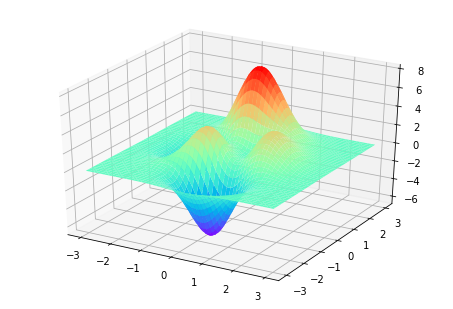

In [3]:
# 将二维转化为三维
fig = plt.figure()
axes3d = Axes3D(fig)
axes3d.plot_surface(X,Y,Z,cmap='rainbow')

In [4]:
import kitorch as kt
from kitorch import optim,no_grad,  functional as F

In [5]:
def model(X,Y):
    a = (-(X**2) - (Y+1)**2).exp()
    b = (-X**2-Y**2).exp()
    c = (-(X+1)**2 - Y**2).exp() 
    return (3*(X-1)**2)*a - 10*(1/5*X - X**3 - Y**5)*b - 1/3*c

In [6]:
def train(x,y,model,optimizer,epochs,points):
    Z0 = model(x,y)
    for epoch in range(epochs):
        Z0.backward()
        optimizer.step()
        Z1 = model(x,y)

        optimizer.zero_grad()
        Z0 = Z1
        points.append((x.data.item(),y.data.item()))
        

In [7]:
x = kt.randn(1,requires_grad=True)
y = kt.randn(1,requires_grad=True)

In [8]:
epochs = 100
# 收敛速度慢Adadelta
# optimizer = optim.Adadelta(paras,lr=1)
x1,y1 = x.deepcopy(),y.deepcopy()
optimizer_Adadelta = optim.Adadelta([[x1,y1]],lr=2)
points_Adadelta = [(x.data.item(),y.data.item())]
train(x1,y1,model,optimizer_Adadelta,epochs,
      points_Adadelta)

# Adagrad
# optimizer = optim.Adagrad(paras,lr=0.1)
x2,y2 = x.deepcopy(),y.deepcopy()
optimizer_Adagrad = optim.Adagrad([[x2,y2]],lr=0.1)
points_Adagrad = [(x.data.item(),y.data.item())]
train(x2,y2,model,optimizer_Adagrad,epochs,
      points_Adagrad)

x3,y3 = x.deepcopy(),y.deepcopy()
optimizer_SGD = optim.SGD([[x3,y3]],lr=0.01,momentum=0.9)
points_SGD = [(x.data.item(),y.data.item())]
train(x3,y3,model,optimizer_SGD,epochs,points_SGD)

x4,y4 = x.deepcopy(),y.deepcopy()
optimizer_Adam = optim.Adam([[x4,y4]],lr=0.1)
points_Adam = [(x.data.item(),y.data.item())]
train(x4,y4,model,optimizer_Adam,epochs,points_Adam)


x5,y5 = x.deepcopy(),y.deepcopy()
optimizer_RMSprop = optim.RMSprop([[x5,y5]],lr=0.1,beta=0.9)
points_RMSprop = [(x.data.item(),y.data.item())]
train(x5,y5,model,optimizer_RMSprop,epochs,points_RMSprop)


In [9]:
# 利用torch进行计算
epochs = 100
x1,y1 = torch.from_numpy(x.data.copy()),torch.from_numpy(y.data.copy())
x1.requires_grad = True
y1.requires_grad = True
optimizer_Adadelta = torch.optim.Adadelta([x1,y1],lr=2)
torch_points_Adadelta = [(x.data.item(),y.data.item())]
train(x1,y1,model,optimizer_Adadelta,epochs,
      torch_points_Adadelta)

x2,y2 = torch.from_numpy(x.data.copy()),torch.from_numpy(y.data.copy())
x2.requires_grad = True
y2.requires_grad = True
optimizer_Adagrad = torch.optim.Adagrad([x2,y2],lr=0.1)
torch_points_Adagrad = [(x.data.item(),y.data.item())]
train(x2,y2,model,optimizer_Adagrad,epochs,
      torch_points_Adagrad)


x3,y3 = torch.from_numpy(x.data.copy()),torch.from_numpy(y.data.copy())
x3.requires_grad = True
y3.requires_grad = True
optimizer_SGD = torch.optim.SGD([x3,y3],lr=0.01,momentum=0.9)
torch_points_SGD = [(x.data.item(),y.data.item())]
train(x3,y3,model,optimizer_SGD,epochs,torch_points_SGD)

x4,y4 = torch.from_numpy(x.data.copy()),torch.from_numpy(y.data.copy())
x4.requires_grad = True
y4.requires_grad = True
optimizer_Adam = torch.optim.Adam([x4,y4],lr=0.1)
torch_points_Adam = [(x.data.item(),y.data.item())]
train(x4,y4,model,optimizer_Adam,epochs,torch_points_Adam)


x5,y5 = torch.from_numpy(x.data.copy()),torch.from_numpy(y.data.copy())
x5.requires_grad = True
y5.requires_grad = True
optimizer_RMSprop = torch.optim.RMSprop([x5,y5],lr=0.1,alpha=0.9)
torch_points_RMSprop = [(x.data.item(),y.data.item())]
train(x5,y5,model,optimizer_RMSprop,epochs,torch_points_RMSprop)

In [10]:
#导入模块
%matplotlib qt5

fig, ax = plt.subplots()
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

def init():
#     ax.contourf(X,Y,Z,cmap='rainbow')
    ax.contour(X,Y,Z)
    ax.set_xlim(-3, 3)
    ax.set_ylim(-3, 3)
    ax.set_title("optimizer analysis")
    time_text.set_text('')
    
    
    return ax,time_text

dot_SGD, = ax.plot([], [], 'ro',markersize=10)
dot_Adam, = ax.plot([], [], 'kp',markersize=10)
dot_Adagrad, = ax.plot([], [], 'b<',markersize=10)
dot_Adadelta, = ax.plot([], [], 'k*',markersize=10)
dot_RMSprop, = ax.plot([], [], 'rv',markersize=10)

def gen_dot():
    times = [i+1 for i in range(len(points_SGD)) ]
    for point in zip(times,points_SGD,points_Adam,
                     points_Adagrad,points_Adadelta,points_RMSprop):
        yield point

def update_dot(newd):
    time_text.set_text('times=%s'%newd[0])
    dot_SGD.set_data(newd[1][0], newd[1][1])
    dot_Adam.set_data(newd[2][0], newd[2][1])
    dot_Adagrad.set_data(newd[3][0], newd[3][1])
    dot_Adadelta.set_data(newd[4][0], newd[4][1])
    dot_RMSprop.set_data(newd[5][0], newd[5][1])
    ax.legend(handles=[dot_SGD,dot_Adam,dot_Adagrad,dot_Adadelta,dot_RMSprop],
              labels=['SGD','Adam','Adagrad','Adadelta','RMSprop'],
              loc='best')
    return dot_SGD,dot_Adam,dot_Adagrad,dot_Adadelta,dot_RMSprop,time_text
 
ani = FuncAnimation(fig, update_dot, 
                          frames = gen_dot, 
                          interval = 500, 
                          init_func=init,
                          repeat = False
                       )

plt.show()

In [11]:
dot_SGD

In [12]:
%matplotlib qt5
global ani
def plot(data,X,Y,Z,title="optimizer analysis",file_name=None,
         interval=200,filled=False):
    global ani
    fig, ax = plt.subplots()
    time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)
    traces = []
    markers = []
    labels = []
    dot_plots = []
    for points,marker,label in data:
        dot_plots.append(ax.plot([], [],marker,markersize=10)[0])
        labels.append(label)
        traces.append(points)
    
    
    def init():
        if filled:
            ax.contourf(X,Y,Z,cmap='rainbow')
        ax.contour(X,Y,Z)
        ax.set_xlim(-3, 3)
        ax.set_ylim(-3, 3)
        ax.set_title(title)
        time_text.set_text('')
        return ax,time_text
    
    def gen_dot():
        num_point = len(traces[0])
        for i in range(num_point):
            new_point = []
            for trace in traces:
                new_point.append(trace[i])
                
            new_point.append(i)
            yield new_point
            
    def update_dot(newd):
        time_text.set_text('times=%s'%newd[-1])
        for idx,dot_plot in enumerate(dot_plots):
            dot_plot.set_data(newd[idx][0], newd[idx][1])
      
        ax.legend(handles=dot_plots,labels=labels,loc='best')
        return dot_plots


    ani = FuncAnimation(fig, update_dot, 
                              frames = gen_dot, 
                              interval = interval, 
                              init_func=init,
                              repeat = False
                           )
    
    plt.show()
    
    if file_name:
        ani.save(file_name,writer='imagemagick')
        
    return ani

In [13]:
data = [
    (points_SGD,'ro','SGD'),
    (points_Adam,'kp','Adam'),
    (points_Adagrad,'b<','Adagrad'),
    (points_Adadelta,'k*','Adadelta'),
    (points_RMSprop,'rv','RMSprop')
]

# data = [
#     (points_Adam,'ro','Numpy'),
#     (torch_points_Adam,'kp','Torch'),
# ]

plot(data,X,Y,Z)